# Mathematical Underpinnings - Lab 4

In [21]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [2]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

In [ ]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [10]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doe do what we want)

In [4]:
n = 5000
rho = 0.5

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
x = data_2d[:,0]
y = data_2d[:,1]

In [5]:
pearson = pearsonr(x, y).statistic
pearson

0.5109518575392921

In [6]:
x_qcut = pd.qcut(x, q=10, labels=range(10), retbins=False).to_numpy()
y_qcut = pd.qcut(y, q=10, labels=range(10), retbins=False).to_numpy()
mi= mutual_info_score(x_qcut, y_qcut)
mi

0.1415043794845421

#### bp 3)

In [7]:
rows = []
rows2 = []
for rho in np.arange(0, 0.81, step=0.05).round(2):
    for i in range(10):
        n = 5000

        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
        x = data_2d[:,0]
        y = data_2d[:,1]

        pearson = pearsonr(x, y).statistic

        x_qcut = pd.qcut(x, q=10, labels=range(10), retbins=False).to_numpy()
        y_qcut = pd.qcut(y, q=10, labels=range(10), retbins=False).to_numpy()
        mi= mutual_info_score(x_qcut, y_qcut)

        rows.append({
            "rho": rho,
            "type": "pearson",
            "value": pearson
        })

        rows.append({
            "rho": rho,
            "type": "mi",
            "value": mi
        })

        rows2.append({
            "rho": rho,
            "mi": mi,
            "pearson": pearson,
        })

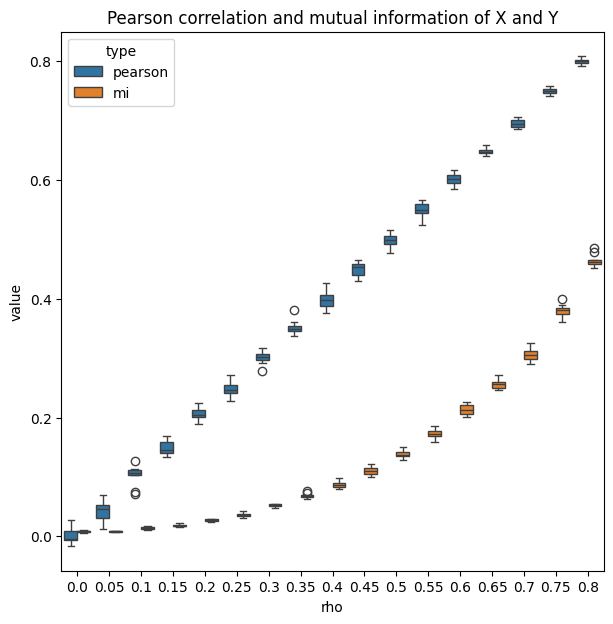

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
df = pd.DataFrame(rows)
sns.boxplot(data=df, x="rho", y="value", hue="type")
plt.title("Pearson correlation and mutual information of X and Y")
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

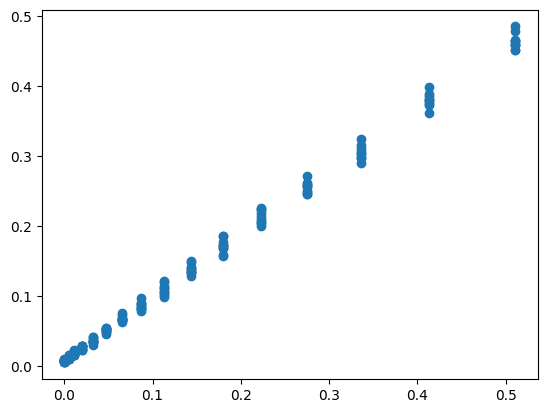

In [10]:
df2 = pd.DataFrame(rows2)

df2["i_hat_1"] = -np.log(1 - df2["rho"].pow(2)) / 2
df2["i_hat_2"] = -np.log(1 - df2["pearson"].pow(2)) / 2

plt.scatter(x=df2["i_hat_1"], y=df2["mi"]);

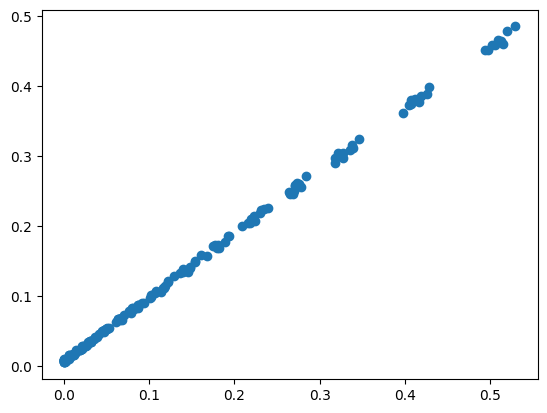

In [11]:
plt.scatter(x=df2["i_hat_2"], y=df2["mi"]);

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

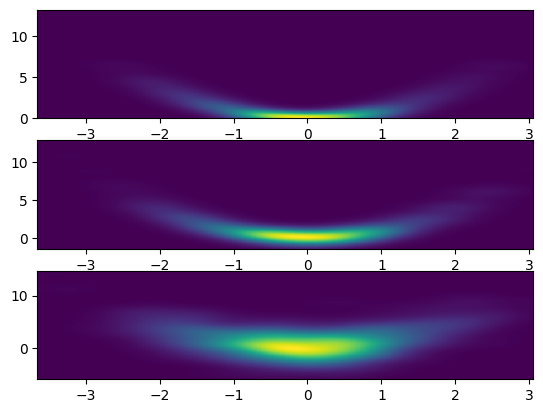

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [12]:
rows = []
for sigma in np.arange(0, 0.81, step=0.1).round(2):
    for i in range(10):
        n = 5000

        x = np.random.normal(0, 1, n)

        data_2d = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
        x = data_2d[:,0]
        y = data_2d[:,1]

        pearson = pearsonr(x, y).statistic

        x_qcut = pd.qcut(x, q=10, labels=range(10), retbins=False).to_numpy()
        y_qcut = pd.qcut(y, q=10, labels=range(10), retbins=False).to_numpy()
        mi= mutual_info_score(x_qcut, y_qcut)

        rows.append({
            "sigma": sigma,
            "type": "pearson",
            "value": pearson
        })

        rows.append({
            "sigma": sigma,
            "type": "mi",
            "value": mi
        })


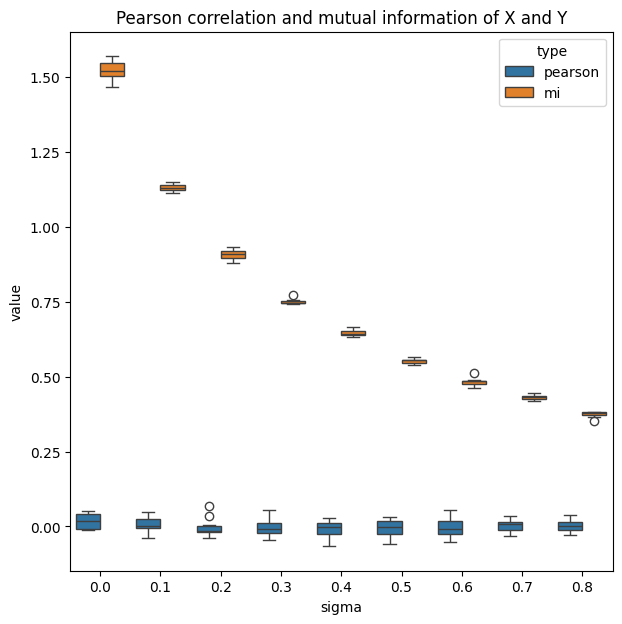

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
df = pd.DataFrame(rows)
sns.boxplot(data=df, x="sigma", y="value", hue="type")
plt.title("Pearson correlation and mutual information of X and Y")
plt.show()

## Task 2

### a)

In [68]:
def indep_test_asymptotic(X, Y, stat):
    X = pd.qcut(X, q=10, labels=range(10), retbins=False).to_numpy()
    Y = pd.qcut(Y, q=10, labels=range(10), retbins=False).to_numpy()

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [69]:
def indep_test_permutation(X, Y, B, stat="mi"):
    X = pd.qcut(X, q=10, labels=range(10), retbins=False).to_numpy()
    Y = pd.qcut(Y, q=10, labels=range(10), retbins=False).to_numpy()

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [70]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

n = 5000
B = 100
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)

In [71]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Pearson’s chi-squared test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', indep_test_permutation(X, Y, B))

MI test: (96.41742060126316, 0.11631227711730396)
Pearson’s chi-squared test: (96.00000000000001, 0.12213499034542497)
Permutation test: (96.41742060126316, 0.12871287128712872)


p-values high -> the null hypothesis is not rejected ($\alpha = 0.05$) for all the tests

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [72]:
# independent r.v. - ideally we will reject the null hypothesis

n = 5000
B = 100
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.9], [0.9, 1]]), n)
X = data[:, 0]
Y = data[:, 1]

In [73]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Pearson’s chi-squared test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', indep_test_permutation(X, Y, B))

MI test: (7335.477578901645, 0.0)
Pearson’s chi-squared test: (8222.279999999999, 0.0)
Permutation test: (7335.477578901645, 0.009900990099009901)


p-values very low -> the null hypothesis should be rejected ($\alpha = 0.05$) for all the tests